In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc



In [12]:
N = 100
tmax = 10
D = 1
def potential(x):
    return x ** 4 / 4 - x ** 2 / 2

def dpotential(x):
    return x ** 3 - x

def action(init_values, q0, qf):
        """function to calculate the stochastic action using the Ito formalism

        Args:
            dt (float): time step width
            q (np.ndarray): position
            k1 (np.ndarray): conjugate variable to q

        Returns:
            float: (discrete) MSR action of system
        """
        q = init_values[:N]
        #k1 = init_values[N:]
        
        q[0] = q0
        q[-1] = qf
        
        dt = tmax / N

        # dimension
        m = len(q) - 1

        # derivatives
        qdot = np.zeros(m)

        qdot[:] = (q[1:] - q[:-1]) / dt

        # action
        S = 0
        
        for i in range(m):
            S += (qdot[i] + dpotential(q[i])) ** 2 / 2
        # (
        #     D**(-1) * np.dot(qdot + misc.derivative(potential, q[:-1]), qdot + misc.derivative(potential, q[:-1]))
        #     #- lambda_ * np.dot(np.ones(m), phi(k1[:-1] * a))
        # )

        # return the action
        return S * dt

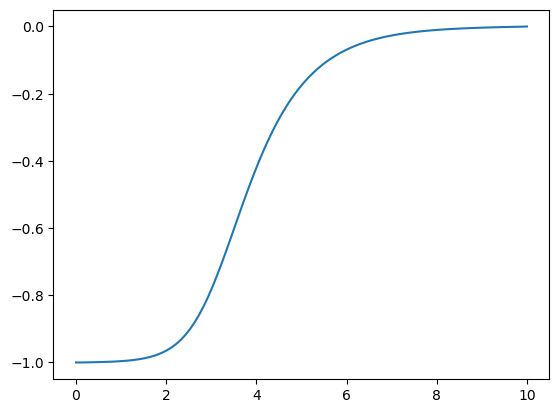

In [16]:

q0 = -1
qf = 0
system = np.linspace(q0, qf, N)
optimum = opt.minimize(action, x0=system, args=(q0, qf))#, constraints=constraint, options={'disp': True})


time = np.linspace(0, tmax, N)
q = np.zeros(N)
q[0] = -1
q[-1] = 0
q[1:-1] = optimum.x[:N-2]


plt.plot(time, q)

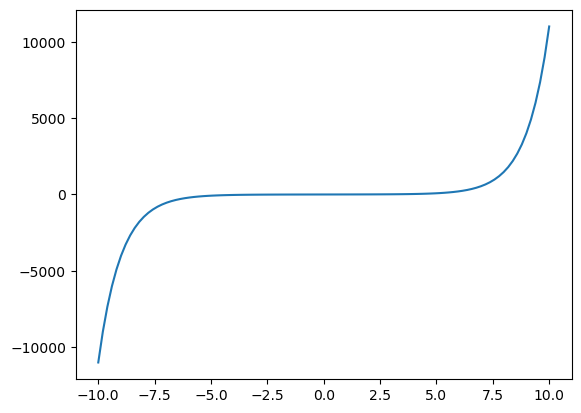

In [8]:
o = 10
k = np.linspace(-o, o, 100)

plt.plot(k, np.sinh(k) + k)
#plt.yscale("log")



In [9]:
print(np.sinh(100))

1.3440585709080678e+43


[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]


(0.01, 1.0, -1.0, 1.0)

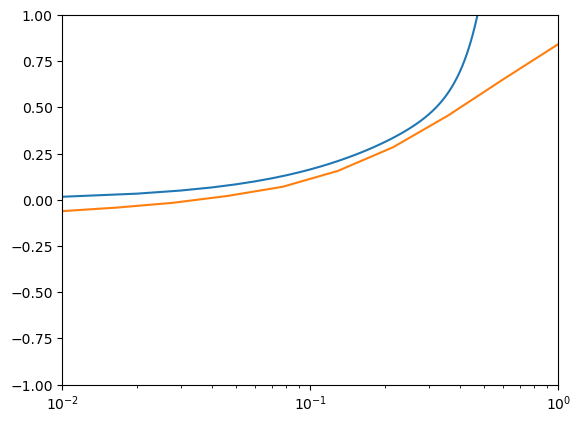

In [5]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred)/(8/27 * t * AP_pred))
plt.plot(tau, (S5 - AP_pred)/(8/27 * tau * AP_pred))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])

(0.01, 1.0, 0.249, 0.26)

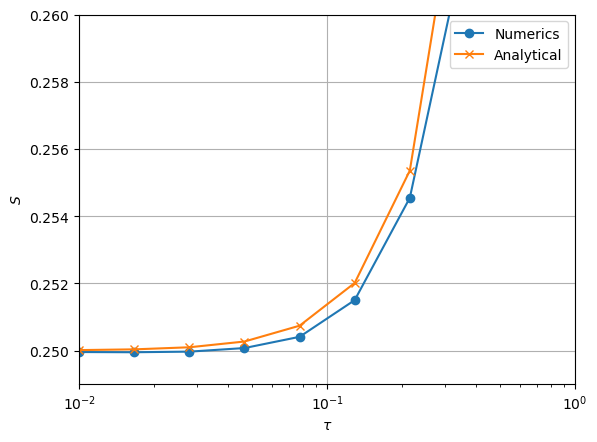

In [14]:
plt.plot(tau, S5, "-o",label="Numerics")
plt.plot(tau, g(tau), "-x", label="Analytical")
plt.xscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S$")
plt.legend()
plt.axis([1e-2, 1e0, 0.249, 0.26])

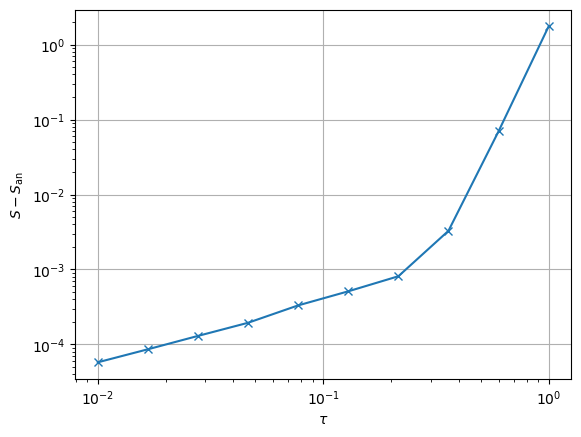

In [9]:
plt.plot(tau, g(tau)-S5, "-x")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S-S_\mathrm{an}$")
plt.show()

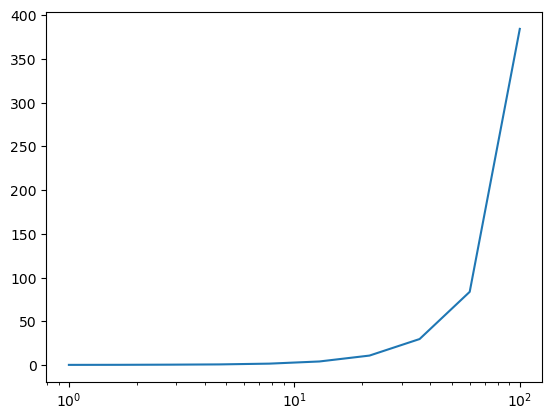

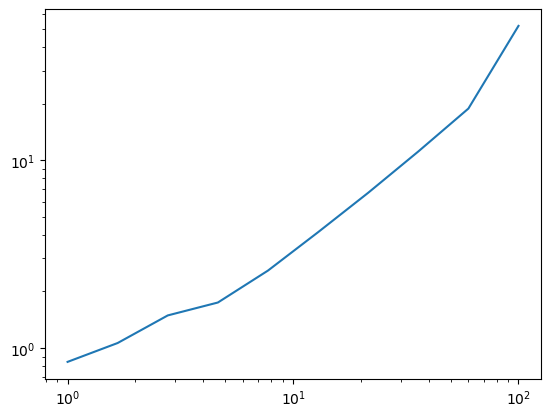

In [13]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau_high.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

f = plt.figure()
plt.plot(tau, S5)
plt.xscale("log")
plt.show()


ff = plt.figure()
plt.plot(tau, (S5-0.25)/(2/27*tau))
plt.xscale("log")
plt.yscale("log")

plt.show()
